### Análise

Análise dos dados de importação de vinhos de mesa, nos últimos 15 anos.

*obs.: Os vinhos importados, denominados de vinhos de mesa são equivalentes aos vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.*

# Leitura dos dados

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [226]:
dados = pd.read_csv("/content/drive/MyDrive/FIAP/Tech Challenge 1/ImpVinhos.csv", sep=";", thousands=".", decimal=",")

In [227]:
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.0,0.0
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574.0,87519642.0


# Limpeza e tratamento dos dados

In [228]:
dados = dados.melt(id_vars=['País'],var_name='anos',value_name='qtd')
dados

,País,anos,qtd
0,Africa do Sul,Id,1.0
1,Alemanha,Id,2.0
2,Argélia,Id,3.0
3,Arábia Saudita,Id,4.0
4,Argentina,Id,5.0
...,...,...,...
7057,Ucrânia,2022.1,0.0
7058,Uruguai,2022.1,9867675.0
7059,Não consta na tabela,2022.1,0.0
7060,Não declarados,2022.1,0.0


In [229]:
dados = dados[dados.anos.str.contains("Id") == False]
dados

,País,anos,qtd
66,Africa do Sul,1970,0.0
67,Alemanha,1970,52297.0
68,Argélia,1970,0.0
69,Arábia Saudita,1970,0.0
70,Argentina,1970,19525.0
...,...,...,...
7057,Ucrânia,2022.1,0.0
7058,Uruguai,2022.1,9867675.0
7059,Não consta na tabela,2022.1,0.0
7060,Não declarados,2022.1,0.0


In [230]:
def determinar_medida(row):
    if row['anos'][-2:] == '.1':
        return 'Valor'
    else:
        return 'Quantidade'

In [231]:
dados['Medida'] = dados.apply(determinar_medida, axis=1)
dados

<ipython-input-231-e1e43db705dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Medida'] = dados.apply(determinar_medida, axis=1)


,País,anos,qtd,Medida
66,Africa do Sul,1970,0.0,Quantidade
67,Alemanha,1970,52297.0,Quantidade
68,Argélia,1970,0.0,Quantidade
69,Arábia Saudita,1970,0.0,Quantidade
70,Argentina,1970,19525.0,Quantidade
...,...,...,...,...
7057,Ucrânia,2022.1,0.0,Valor
7058,Uruguai,2022.1,9867675.0,Valor
7059,Não consta na tabela,2022.1,0.0,Valor
7060,Não declarados,2022.1,0.0,Valor


In [232]:
dados['qtd'] = dados['qtd'].fillna(0)
dados

<ipython-input-232-a6d861a1605a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['qtd'] = dados['qtd'].fillna(0)


,País,anos,qtd,Medida
66,Africa do Sul,1970,0.0,Quantidade
67,Alemanha,1970,52297.0,Quantidade
68,Argélia,1970,0.0,Quantidade
69,Arábia Saudita,1970,0.0,Quantidade
70,Argentina,1970,19525.0,Quantidade
...,...,...,...,...
7057,Ucrânia,2022.1,0.0,Valor
7058,Uruguai,2022.1,9867675.0,Valor
7059,Não consta na tabela,2022.1,0.0,Valor
7060,Não declarados,2022.1,0.0,Valor


# Quantidades importadas

In [233]:
quantidades = dados[dados.Medida.str.contains("Quantidade") == True]
quantidades

,País,anos,qtd,Medida
66,Africa do Sul,1970,0.0,Quantidade
67,Alemanha,1970,52297.0,Quantidade
68,Argélia,1970,0.0,Quantidade
69,Arábia Saudita,1970,0.0,Quantidade
70,Argentina,1970,19525.0,Quantidade
...,...,...,...,...
6991,Ucrânia,2022,0.0,Quantidade
6992,Uruguai,2022,3394161.0,Quantidade
6993,Não consta na tabela,2022,0.0,Quantidade
6994,Não declarados,2022,0.0,Quantidade


In [234]:
quantidades = quantidades.set_index('País')
quantidades

,anos,qtd,Medida
País,,,
Africa do Sul,1970,0.0,Quantidade
Alemanha,1970,52297.0,Quantidade
Argélia,1970,0.0,Quantidade
Arábia Saudita,1970,0.0,Quantidade
Argentina,1970,19525.0,Quantidade
...,...,...,...
Ucrânia,2022,0.0,Quantidade
Uruguai,2022,3394161.0,Quantidade
Não consta na tabela,2022,0.0,Quantidade


In [235]:
quantidades['anos'] = quantidades['anos'].astype(int)
quantidades = quantidades[quantidades.anos > 2006]
quantidades

,anos,qtd,Medida
País,,,
Africa do Sul,2007,386425.0,Quantidade
Alemanha,2007,234006.0,Quantidade
Argélia,2007,0.0,Quantidade
Arábia Saudita,2007,0.0,Quantidade
Argentina,2007,15621172.0,Quantidade
...,...,...,...
Ucrânia,2022,0.0,Quantidade
Uruguai,2022,3394161.0,Quantidade
Não consta na tabela,2022,0.0,Quantidade


In [236]:
quantidades = quantidades.pivot_table(values='qtd', index=quantidades.index, columns='anos', aggfunc='first')

In [237]:
quantidades

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Africa do Sul,386425.0,315380.0,493093.0,966276.0,507509.0,722327.0,475331.0,722715.0,743335.0,578829.0,1138732.0,1127053.0,1092042.0,627150.0,859169.0,738116.0
Alemanha,234006.0,293935.0,56075.0,192661.0,198025.0,113243.0,114866.0,115804.0,95171.0,158386.0,83289.0,142971.0,101055.0,136992.0,106541.0,92600.0
Argentina,15621172.0,14417761.0,13902750.0,16965266.0,16673491.0,14613839.0,12732815.0,13437321.0,12465041.0,14098009.0,15461740.0,15221318.0,16548931.0,22610267.0,26869241.0,27980574.0
Argélia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armênia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunísia,0.0,0.0,0.0,0.0,16420.0,19913.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turquia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32247.0,0.0,0.0,1591.0,0.0,17563.0,0.0,22087.0
Ucrânia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5319.0,865.0,0.0,4646.0,0.0,0.0,0.0


In [238]:
quantidades.loc['Total'] = quantidades.sum(numeric_only=True)

In [239]:
quantidades.tail()

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Turquia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32247.0,0.0,0.0,1591.0,0.0,17563.0,0.0,22087.0
Ucrânia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5319.0,865.0,0.0,4646.0,0.0,0.0,0.0
Uruguai,2387225.0,920389.0,750343.0,1219387.0,1264306.0,1323884.0,1372329.0,1237537.0,1399547.0,2215692.0,5009098.0,2836574.0,2778244.0,4079076.0,3788831.0,3394161.0
Áustria,1688.0,11388.0,1895.0,2329.0,6357.0,8098.0,56849.0,2770.0,360.0,1485.0,2655.0,513995.0,348289.0,6540.0,13427.0,7403.0
Total,57629724.0,54410076.0,55926957.0,70737868.0,72705225.0,74209440.0,67954436.0,76910155.0,77686474.0,88345068.0,118330745.0,109971001.0,114175423.0,147135137.0,154690551.0,147600655.0


In [240]:
total_por_ano = pd.DataFrame(quantidades.loc['Total'])
total_por_ano.head()

,Total
anos,
2007,57629724.0
2008,54410076.0
2009,55926957.0
2010,70737868.0
2011,72705225.0


In [241]:
total_importado_nos_ultimos_15_anos = total_por_ano['Total'].sum()
total_importado_nos_ultimos_15_anos

1488418935.0

### TOTAL IMPORTADO NOS ÚLTIMOS 15 ANOS = 1.488.418.935 kg

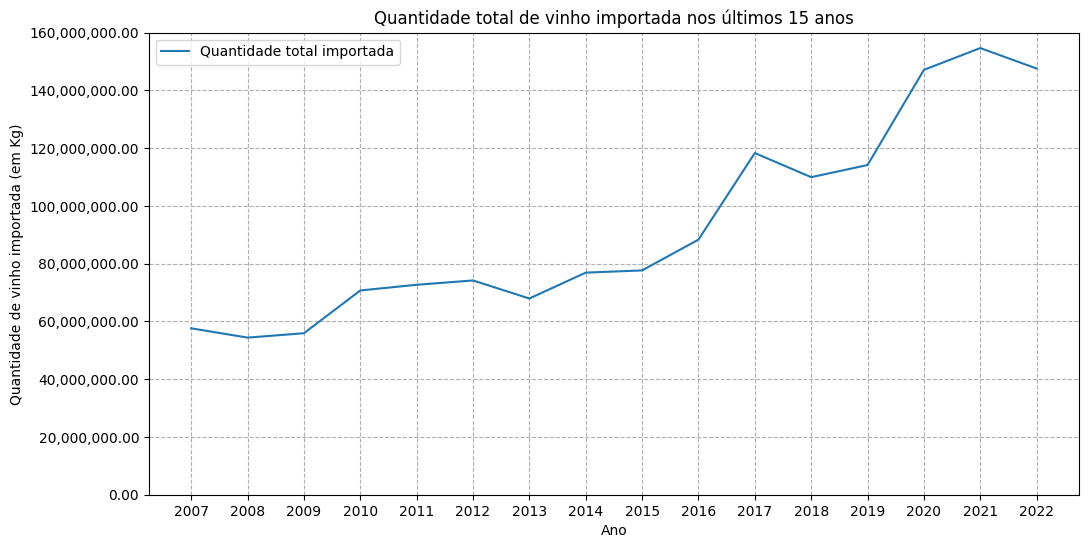

In [242]:
axis = total_por_ano.plot(kind="line", figsize=(12,6), ylabel='Quantidade de vinho importada (em Kg)', xlabel="Ano")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

axis.set_xticks(total_por_ano.index)

axis.legend(['Quantidade total importada'])

plt.title("Quantidade total de vinho importada nos últimos 15 anos")

plt.ylim(0, 160000000)
plt.grid(linestyle='--')

plt.show()

In [243]:
quantidades = quantidades.drop('Total', axis=0)
quantidades

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Africa do Sul,386425.0,315380.0,493093.0,966276.0,507509.0,722327.0,475331.0,722715.0,743335.0,578829.0,1138732.0,1127053.0,1092042.0,627150.0,859169.0,738116.0
Alemanha,234006.0,293935.0,56075.0,192661.0,198025.0,113243.0,114866.0,115804.0,95171.0,158386.0,83289.0,142971.0,101055.0,136992.0,106541.0,92600.0
Argentina,15621172.0,14417761.0,13902750.0,16965266.0,16673491.0,14613839.0,12732815.0,13437321.0,12465041.0,14098009.0,15461740.0,15221318.0,16548931.0,22610267.0,26869241.0,27980574.0
Argélia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armênia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunísia,0.0,0.0,0.0,0.0,16420.0,19913.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turquia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32247.0,0.0,0.0,1591.0,0.0,17563.0,0.0,22087.0
Ucrânia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5319.0,865.0,0.0,4646.0,0.0,0.0,0.0


In [244]:
quantidades['Total'] = quantidades.sum(axis=1)
quantidades

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,
Africa do Sul,386425.0,315380.0,493093.0,966276.0,507509.0,722327.0,475331.0,722715.0,743335.0,578829.0,1138732.0,1127053.0,1092042.0,627150.0,859169.0,738116.0,11493482.0
Alemanha,234006.0,293935.0,56075.0,192661.0,198025.0,113243.0,114866.0,115804.0,95171.0,158386.0,83289.0,142971.0,101055.0,136992.0,106541.0,92600.0,2235620.0
Argentina,15621172.0,14417761.0,13902750.0,16965266.0,16673491.0,14613839.0,12732815.0,13437321.0,12465041.0,14098009.0,15461740.0,15221318.0,16548931.0,22610267.0,26869241.0,27980574.0,269619536.0
Argélia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armênia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2385.0,2385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunísia,0.0,0.0,0.0,0.0,16420.0,19913.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44333.0
Turquia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32247.0,0.0,0.0,1591.0,0.0,17563.0,0.0,22087.0,73488.0
Ucrânia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5319.0,865.0,0.0,4646.0,0.0,0.0,0.0,10830.0


In [245]:
quantidades = quantidades.sort_values('Total', ascending=False)
quantidades

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,
Chile,18845522.0,18662626.0,22476643.0,26434744.0,26642889.0,30258795.0,28288212.0,35479279.0,36686870.0,43400991.0,51787643.0,51104825.0,52697108.0,72726186.0,69617587.0,68881232.0,653991152.0
Argentina,15621172.0,14417761.0,13902750.0,16965266.0,16673491.0,14613839.0,12732815.0,13437321.0,12465041.0,14098009.0,15461740.0,15221318.0,16548931.0,22610267.0,26869241.0,27980574.0,269619536.0
Portugal,6805601.0,6213781.0,5884719.0,7801759.0,8556375.0,9714940.0,9299080.0,9735153.0,9952290.0,10821232.0,17345709.0,17698831.0,18228699.0,23627260.0,25925363.0,24108787.0,211719579.0
Itália,9177932.0,9723292.0,8387908.0,11911190.0,12025827.0,10506144.0,8308831.0,8566756.0,8261383.0,7936409.0,11538990.0,10154564.0,10323254.0,9659999.0,11231625.0,9622119.0,157336223.0
França,2737947.0,2466277.0,2372448.0,2799118.0,3329437.0,3181440.0,3265362.0,3592782.0,3617130.0,3831566.0,5921728.0,4653789.0,5324383.0,5658139.0,6241310.0,4911903.0,63904759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Coreia do Sul, República",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Outros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Não consta na tabela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
quantidades.head(10) # 10 países que mais exportaram vinhos de mesa para o Brasil nos últimos 15 anos

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,
Chile,18845522.0,18662626.0,22476643.0,26434744.0,26642889.0,30258795.0,28288212.0,35479279.0,36686870.0,43400991.0,51787643.0,51104825.0,52697108.0,72726186.0,69617587.0,68881232.0,653991152.0
Argentina,15621172.0,14417761.0,13902750.0,16965266.0,16673491.0,14613839.0,12732815.0,13437321.0,12465041.0,14098009.0,15461740.0,15221318.0,16548931.0,22610267.0,26869241.0,27980574.0,269619536.0
Portugal,6805601.0,6213781.0,5884719.0,7801759.0,8556375.0,9714940.0,9299080.0,9735153.0,9952290.0,10821232.0,17345709.0,17698831.0,18228699.0,23627260.0,25925363.0,24108787.0,211719579.0
Itália,9177932.0,9723292.0,8387908.0,11911190.0,12025827.0,10506144.0,8308831.0,8566756.0,8261383.0,7936409.0,11538990.0,10154564.0,10323254.0,9659999.0,11231625.0,9622119.0,157336223.0
França,2737947.0,2466277.0,2372448.0,2799118.0,3329437.0,3181440.0,3265362.0,3592782.0,3617130.0,3831566.0,5921728.0,4653789.0,5324383.0,5658139.0,6241310.0,4911903.0,63904759.0
Espanha,862045.0,990697.0,1119540.0,1622100.0,1999970.0,2540209.0,2772104.0,2760797.0,3024533.0,3948614.0,7240535.0,5595268.0,5797980.0,7169384.0,8793911.0,6487047.0,62724734.0
Uruguai,2387225.0,920389.0,750343.0,1219387.0,1264306.0,1323884.0,1372329.0,1237537.0,1399547.0,2215692.0,5009098.0,2836574.0,2778244.0,4079076.0,3788831.0,3394161.0,35976623.0
Africa do Sul,386425.0,315380.0,493093.0,966276.0,507509.0,722327.0,475331.0,722715.0,743335.0,578829.0,1138732.0,1127053.0,1092042.0,627150.0,859169.0,738116.0,11493482.0
Estados Unidos,79376.0,65956.0,85393.0,194774.0,369806.0,379329.0,518888.0,788773.0,775131.0,725420.0,1372347.0,548655.0,534870.0,366584.0,506405.0,393211.0,7704918.0


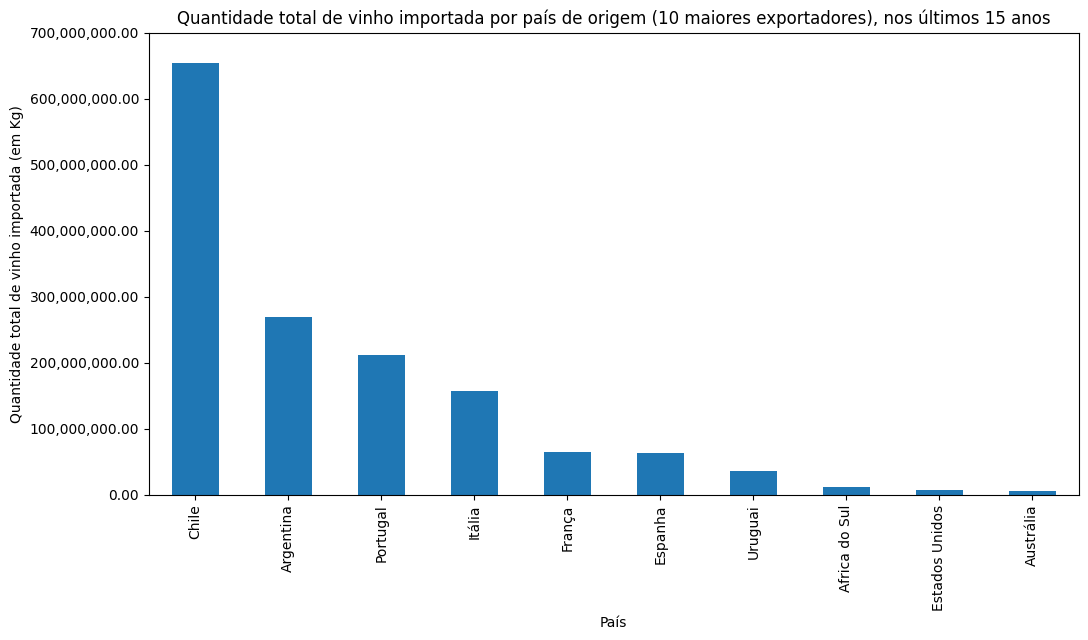

In [247]:
total_importado_quantidades = quantidades['Total']
total_importado_quantidades.columns = ['Total']

axis = total_importado_quantidades.T.head(10).plot(kind="bar", figsize=(12,6), xlabel="País", ylabel="Quantidade total de vinho importada (em Kg)")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Quantidade total de vinho importada por país de origem (10 maiores exportadores), nos últimos 15 anos")
plt.ylim(0, 700000000)

plt.show()

In [248]:
maiores_importadores = quantidades.drop('Total',axis='columns')
maiores_importadores

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Chile,18845522.0,18662626.0,22476643.0,26434744.0,26642889.0,30258795.0,28288212.0,35479279.0,36686870.0,43400991.0,51787643.0,51104825.0,52697108.0,72726186.0,69617587.0,68881232.0
Argentina,15621172.0,14417761.0,13902750.0,16965266.0,16673491.0,14613839.0,12732815.0,13437321.0,12465041.0,14098009.0,15461740.0,15221318.0,16548931.0,22610267.0,26869241.0,27980574.0
Portugal,6805601.0,6213781.0,5884719.0,7801759.0,8556375.0,9714940.0,9299080.0,9735153.0,9952290.0,10821232.0,17345709.0,17698831.0,18228699.0,23627260.0,25925363.0,24108787.0
Itália,9177932.0,9723292.0,8387908.0,11911190.0,12025827.0,10506144.0,8308831.0,8566756.0,8261383.0,7936409.0,11538990.0,10154564.0,10323254.0,9659999.0,11231625.0,9622119.0
França,2737947.0,2466277.0,2372448.0,2799118.0,3329437.0,3181440.0,3265362.0,3592782.0,3617130.0,3831566.0,5921728.0,4653789.0,5324383.0,5658139.0,6241310.0,4911903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Coreia do Sul, República",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Outros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Não consta na tabela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


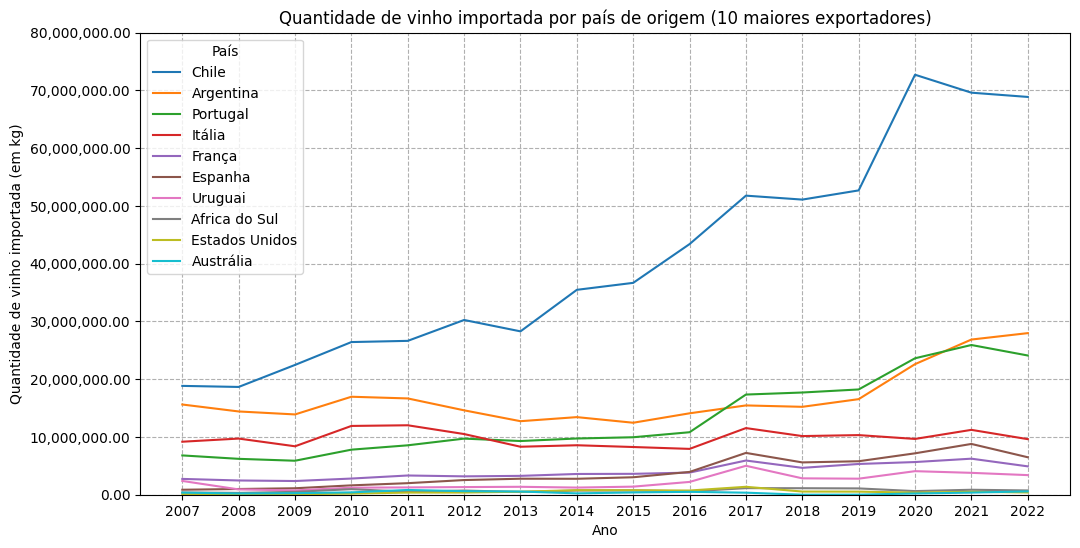

In [249]:
axis = maiores_importadores.head(10).T.plot(kind="line", figsize=(12,6), xlabel="Ano", ylabel="Quantidade de vinho importada (em kg)")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

axis.set_xticks(maiores_importadores.columns.astype(int))

plt.ylim([0, 80000000])

plt.title("Quantidade de vinho importada por país de origem (10 maiores exportadores)")
plt.grid(linestyle='--')

plt.show()

# Valores Importados

In [250]:
valores = dados[dados.Medida.str.contains("Valor") == True]
valores

,País,anos,qtd,Medida
132,Africa do Sul,1970.1,0.0,Valor
133,Alemanha,1970.1,30498.0,Valor
134,Argélia,1970.1,0.0,Valor
135,Arábia Saudita,1970.1,0.0,Valor
136,Argentina,1970.1,12260.0,Valor
...,...,...,...,...
7057,Ucrânia,2022.1,0.0,Valor
7058,Uruguai,2022.1,9867675.0,Valor
7059,Não consta na tabela,2022.1,0.0,Valor
7060,Não declarados,2022.1,0.0,Valor


In [251]:
valores['anos'] = valores['anos'].str.slice(start=0, stop=4)
valores

<ipython-input-251-5e158bb61d44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['anos'] = valores['anos'].str.slice(start=0, stop=4)


,País,anos,qtd,Medida
132,Africa do Sul,1970,0.0,Valor
133,Alemanha,1970,30498.0,Valor
134,Argélia,1970,0.0,Valor
135,Arábia Saudita,1970,0.0,Valor
136,Argentina,1970,12260.0,Valor
...,...,...,...,...
7057,Ucrânia,2022,0.0,Valor
7058,Uruguai,2022,9867675.0,Valor
7059,Não consta na tabela,2022,0.0,Valor
7060,Não declarados,2022,0.0,Valor


In [252]:
valores = valores.set_index('País')
valores

,anos,qtd,Medida
País,,,
Africa do Sul,1970,0.0,Valor
Alemanha,1970,30498.0,Valor
Argélia,1970,0.0,Valor
Arábia Saudita,1970,0.0,Valor
Argentina,1970,12260.0,Valor
...,...,...,...
Ucrânia,2022,0.0,Valor
Uruguai,2022,9867675.0,Valor
Não consta na tabela,2022,0.0,Valor


In [253]:
valores['anos'] = valores['anos'].astype(int)
valores = valores[valores.anos > 2006]
valores

,anos,qtd,Medida
País,,,
Africa do Sul,2007,1320244.0,Valor
Alemanha,2007,647626.0,Valor
Argélia,2007,0.0,Valor
Arábia Saudita,2007,0.0,Valor
Argentina,2007,36160548.0,Valor
...,...,...,...
Ucrânia,2022,0.0,Valor
Uruguai,2022,9867675.0,Valor
Não consta na tabela,2022,0.0,Valor


In [254]:
valores = valores.pivot_table(values='qtd', index=valores.index, columns='anos', aggfunc='first')

In [255]:
valores['Total'] = valores.sum(axis=1)
valores

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,
Africa do Sul,1320244.0,1151699.0,1931449.0,3600658.0,2136394.0,3041449.0,1985184.0,3033932.0,2996543.0,1686226.0,3241298.0,3574371.0,3604038.0,1701072.0,2508140.0,2266827.0,39779524.0
Alemanha,647626.0,1063825.0,291876.0,784674.0,933545.0,591167.0,414070.0,483316.0,358275.0,606333.0,315959.0,516975.0,412794.0,504168.0,546967.0,438595.0,8910165.0
Argentina,36160548.0,37382581.0,38521731.0,52126581.0,58806736.0,55633562.0,49524694.0,53815956.0,48043201.0,45214862.0,51770842.0,52817642.0,54527380.0,66322932.0,79527959.0,87519642.0,867716849.0
Argélia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
Armênia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13668.0,13668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunísia,0.0,0.0,0.0,0.0,37492.0,42918.0,20892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101302.0
Turquia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109741.0,0.0,0.0,1245.0,0.0,55039.0,0.0,38817.0,204842.0
Ucrânia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9679.0,931.0,0.0,3074.0,0.0,0.0,0.0,13684.0


In [256]:
valores = valores.sort_values('Total', ascending=False)
valores

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,
Chile,47680946.0,50748373.0,61380795.0,72983389.0,84952500.0,93315735.0,90281256.0,113375484.0,107684380.0,123183079.0,145628860.0,144731210.0,145471294.0,176540499.0,182568098.0,184335335.0,1.824861e+09
Argentina,36160548.0,37382581.0,38521731.0,52126581.0,58806736.0,55633562.0,49524694.0,53815956.0,48043201.0,45214862.0,51770842.0,52817642.0,54527380.0,66322932.0,79527959.0,87519642.0,8.677168e+08
Portugal,23945522.0,23826443.0,23688318.0,29299792.0,35247223.0,36190898.0,35729522.0,37071142.0,32547365.0,29495190.0,45032247.0,53237413.0,51444189.0,66353572.0,75668823.0,64795326.0,6.635730e+08
Itália,22023175.0,24378627.0,23079424.0,28683242.0,35481781.0,30750897.0,30799292.0,31697736.0,25846195.0,22216811.0,33707111.0,34857594.0,33355982.0,32477890.0,39852162.0,33330465.0,4.825384e+08
França,14721769.0,16275708.0,16893114.0,18778566.0,22917012.0,21636175.0,23336291.0,27480375.0,19353291.0,15940341.0,25280255.0,22688105.0,24299524.0,24894394.0,31428188.0,25955232.0,3.518783e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Coreia do Sul, República",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
Não consta na tabela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
Não declarados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


In [257]:
valores.head(10) # 10 países que mais exportaram vinhos de mesa para o Brasil nos últimos 15 anos

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,,
Chile,47680946.0,50748373.0,61380795.0,72983389.0,84952500.0,93315735.0,90281256.0,113375484.0,107684380.0,123183079.0,145628860.0,144731210.0,145471294.0,176540499.0,182568098.0,184335335.0,1.824861e+09
Argentina,36160548.0,37382581.0,38521731.0,52126581.0,58806736.0,55633562.0,49524694.0,53815956.0,48043201.0,45214862.0,51770842.0,52817642.0,54527380.0,66322932.0,79527959.0,87519642.0,8.677168e+08
Portugal,23945522.0,23826443.0,23688318.0,29299792.0,35247223.0,36190898.0,35729522.0,37071142.0,32547365.0,29495190.0,45032247.0,53237413.0,51444189.0,66353572.0,75668823.0,64795326.0,6.635730e+08
Itália,22023175.0,24378627.0,23079424.0,28683242.0,35481781.0,30750897.0,30799292.0,31697736.0,25846195.0,22216811.0,33707111.0,34857594.0,33355982.0,32477890.0,39852162.0,33330465.0,4.825384e+08
França,14721769.0,16275708.0,16893114.0,18778566.0,22917012.0,21636175.0,23336291.0,27480375.0,19353291.0,15940341.0,25280255.0,22688105.0,24299524.0,24894394.0,31428188.0,25955232.0,3.518783e+08
Espanha,4506858.0,6036397.0,6224187.0,8698824.0,11175636.0,11724946.0,13570874.0,12797753.0,11396855.0,12221512.0,19834451.0,19353631.0,17111436.0,19802061.0,23795616.0,17187749.0,2.154388e+08
Uruguai,3131899.0,2089539.0,1953390.0,3175051.0,3481552.0,3735892.0,3740613.0,3782282.0,4069100.0,5099162.0,7751966.0,8467846.0,7938059.0,10146829.0,10063341.0,9867675.0,8.849420e+07
Africa do Sul,1320244.0,1151699.0,1931449.0,3600658.0,2136394.0,3041449.0,1985184.0,3033932.0,2996543.0,1686226.0,3241298.0,3574371.0,3604038.0,1701072.0,2508140.0,2266827.0,3.977952e+07
Estados Unidos,334204.0,542331.0,702825.0,1344921.0,1756901.0,1995929.0,2817086.0,4171731.0,3848755.0,2924715.0,4110641.0,2584781.0,2400830.0,2119234.0,2809649.0,3023220.0,3.748775e+07


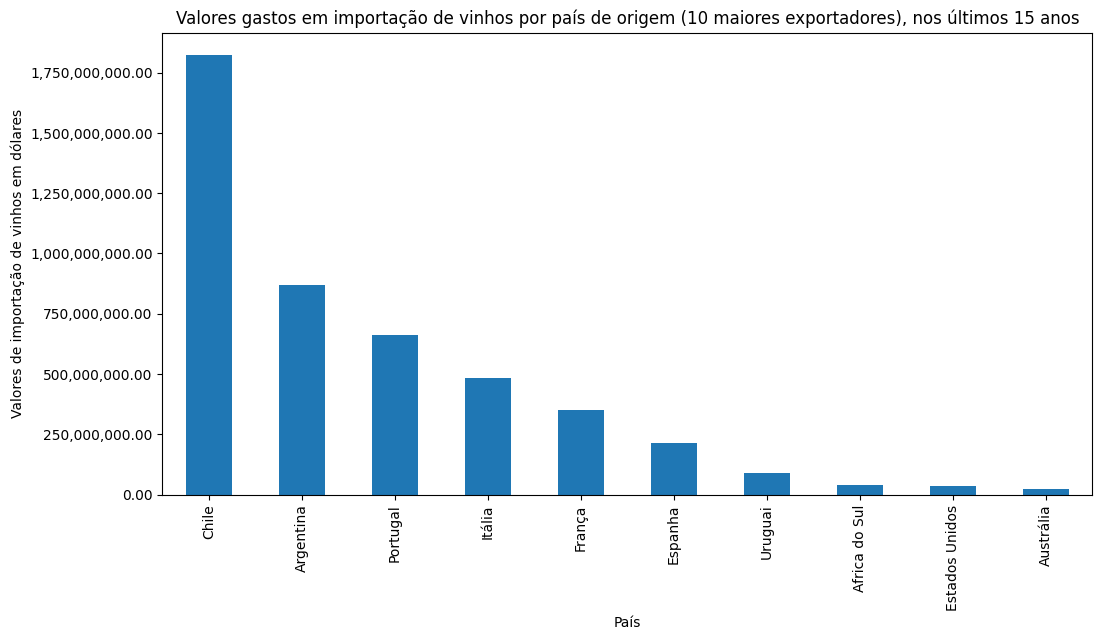

In [258]:
total_importado_valores = valores['Total']
total_importado_valores.columns = ['Total']

axis = total_importado_valores.T.head(10).plot(kind="bar", figsize=(12,6), xlabel="País", ylabel="Valores de importação de vinhos em dólares")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valores gastos em importação de vinhos por país de origem (10 maiores exportadores), nos últimos 15 anos")

plt.show()

In [259]:
maiores_importadores_valores = valores.drop('Total',axis='columns')
maiores_importadores_valores

anos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Chile,47680946.0,50748373.0,61380795.0,72983389.0,84952500.0,93315735.0,90281256.0,113375484.0,107684380.0,123183079.0,145628860.0,144731210.0,145471294.0,176540499.0,182568098.0,184335335.0
Argentina,36160548.0,37382581.0,38521731.0,52126581.0,58806736.0,55633562.0,49524694.0,53815956.0,48043201.0,45214862.0,51770842.0,52817642.0,54527380.0,66322932.0,79527959.0,87519642.0
Portugal,23945522.0,23826443.0,23688318.0,29299792.0,35247223.0,36190898.0,35729522.0,37071142.0,32547365.0,29495190.0,45032247.0,53237413.0,51444189.0,66353572.0,75668823.0,64795326.0
Itália,22023175.0,24378627.0,23079424.0,28683242.0,35481781.0,30750897.0,30799292.0,31697736.0,25846195.0,22216811.0,33707111.0,34857594.0,33355982.0,32477890.0,39852162.0,33330465.0
França,14721769.0,16275708.0,16893114.0,18778566.0,22917012.0,21636175.0,23336291.0,27480375.0,19353291.0,15940341.0,25280255.0,22688105.0,24299524.0,24894394.0,31428188.0,25955232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Coreia do Sul, República",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Não consta na tabela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Não declarados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


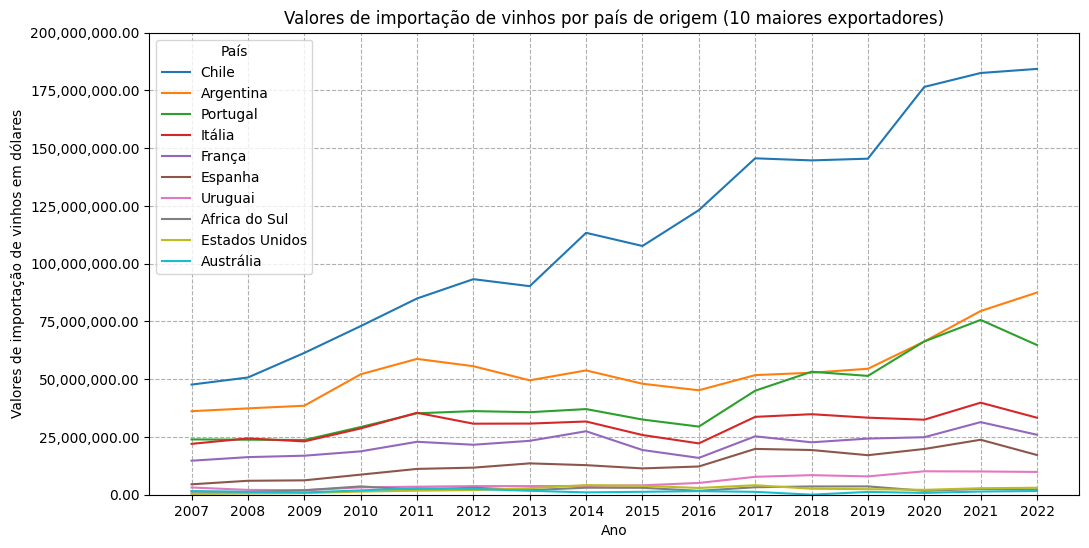

In [260]:
axis = maiores_importadores_valores.head(10).T.plot(kind="line", figsize=(12,6), xlabel="Ano", ylabel="Valores de importação de vinhos em dólares")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

axis.set_xticks(maiores_importadores_valores.columns.astype(int))

plt.ylim([0, 200000000])

plt.title("Valores de importação de vinhos por país de origem (10 maiores exportadores)")
plt.grid(linestyle='--')

plt.show()